<a href="https://colab.research.google.com/github/kayeekim/kayeekim.github.io/blob/master/_code_practice/%EC%8B%A4%EB%AC%B4%EC%97%90_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_7_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 실무에 활용하는 머신러닝

http://www.kocw.net/home/cview.do?mty=p&kemId=1380150

## k-NN 알고리즘 활용 실습

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

display(df.head())
display(df.Pos.value_counts())


,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


SG    50
C     50
Name: Pos, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


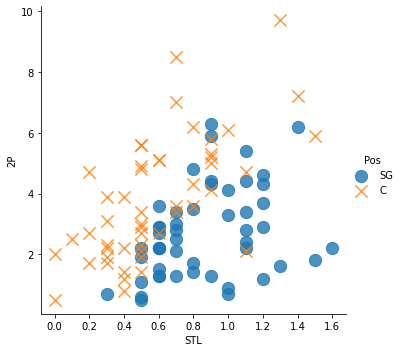

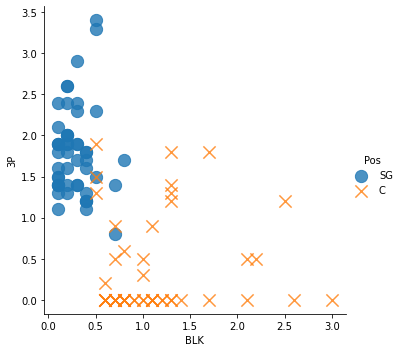

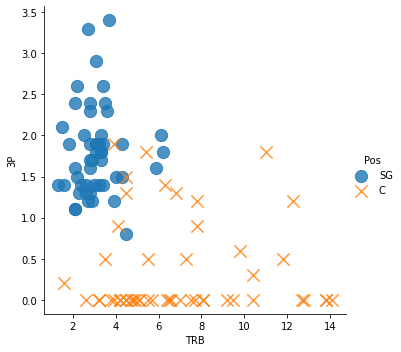

In [2]:
# 특정 feature 시각화
import seaborn as sns

# 데이터 간 경계가 너무 근접하여 분류하기에 모호한 경우
sns.lmplot('STL', '2P', data=df, fit_reg=False,
           scatter_kws={"s":150},
           markers=["o", "x"],
           hue="Pos")

# 같은 분류끼리 근접해있고, 다른 분류와는 멀리 떨어져 있는 경우 
sns.lmplot('BLK', '3P', data=df, fit_reg=False,
           scatter_kws={"s":150},
           markers=["o", "x"],
           hue="Pos")

# 같은 분류끼리 근접해있고, 다른 분류와는 멀리 떨어져 있는 경우 
sns.lmplot('TRB', '3P', data=df, fit_reg=False,
           scatter_kws={"s":150},
           markers=["o", "x"],
           hue="Pos")

In [3]:
# 불필요한 feature 제거
df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [4]:
# train, test set 분리
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print(train.shape[0], test.shape[0])

80 20


## 최적의 kNN 파라미터 찾기

In [5]:
# k-NN
# 최적 모델 parameter 찾기.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2): # 3 < i <= max_k_range 수 중에서 간격=2만큼 뽑아줌.
  k_list.append(i)
print(f'k_list= {k_list}')

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]
print(f'y_train.values.shape: \n {y_train.values.shape}')
print(f'y_train.values.ravel().shape:\n {y_train.values.ravel().shape}') # Numpy 다차원 배열을 1차원으로 바꾸는 것을 지원하는 3개의 함수: ravel(), reshape(), flatten()
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
  cross_validation_scores.append(scores.mean())

print(cross_validation_scores)

k_list= [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
y_train.values.shape: 
 (80, 1)
y_train.values.ravel().shape:
 (80,)
[0.9375, 0.9375, 0.925, 0.925, 0.925, 0.9125, 0.9, 0.9, 0.9, 0.9, 0.9, 0.875, 0.8625, 0.8625, 0.8625, 0.8625, 0.8625, 0.85, 0.8375]


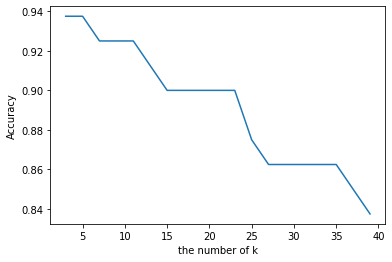

The best number of k :3


In [6]:
# k의 변화에 따른 accuracy 시각화
import matplotlib.pyplot as plt

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k :' + str(k))

## k-NN 모델 테스트

In [7]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]
knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]
pred = knn.predict(x_test)

print(f"accuracy : {str(accuracy_score(y_test.values.ravel(), pred))}")                  
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison.head()

accuracy : 0.85


,prediction,ground_truth
0,SG,SG
1,SG,SG
2,C,C
3,C,C
4,C,C
